In [3]:
import pandas as pd
df = pd.read_csv("Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


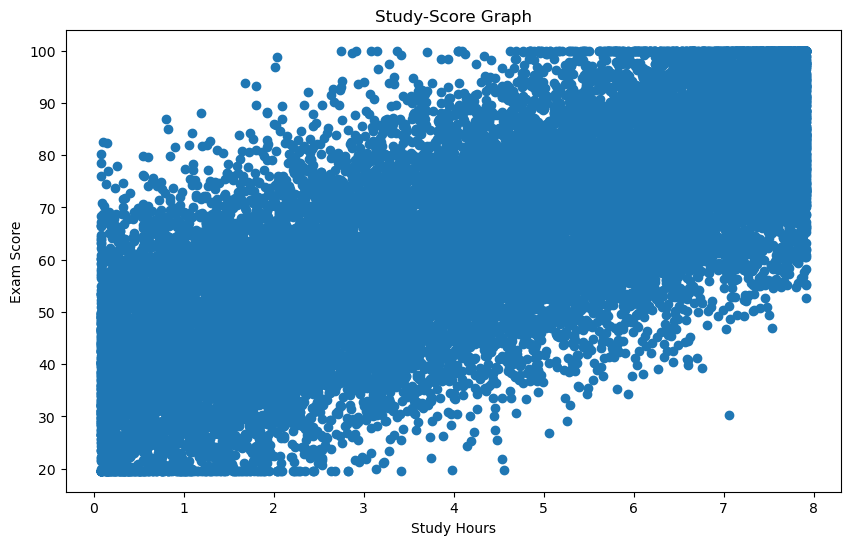

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df["study_hours"],df["exam_score"])
plt.title("Study-Score Graph")
plt.ylabel("Exam Score")
plt.xlabel("Study Hours")
plt.show()

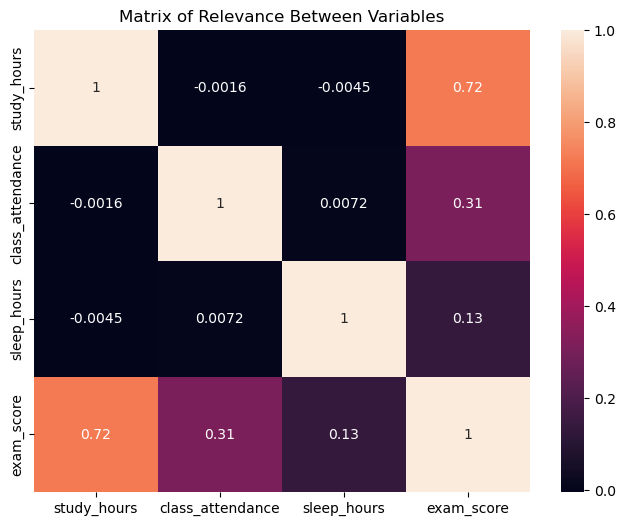

In [17]:
numerical_data = df[["study_hours","class_attendance","sleep_hours","exam_score"]]
correlation = numerical_data.corr()

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True)
plt.title("Matrix of Relevance Between Variables")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender_code"] = le.fit_transform(df["gender"])
df["internet_access_code"] = le.fit_transform(df["internet_access"]) 
df["sleep_quality_code"] = le.fit_transform(df["sleep_quality"]) 
df["study_method_code"] = le.fit_transform(df["study_method"]) 
df["facility_rating_code"] = le.fit_transform(df["facility_rating"]) 
df["exam_difficulty_code"] = le.fit_transform(df["exam_difficulty"]) 
df["course_code"] = le.fit_transform(df["course"])

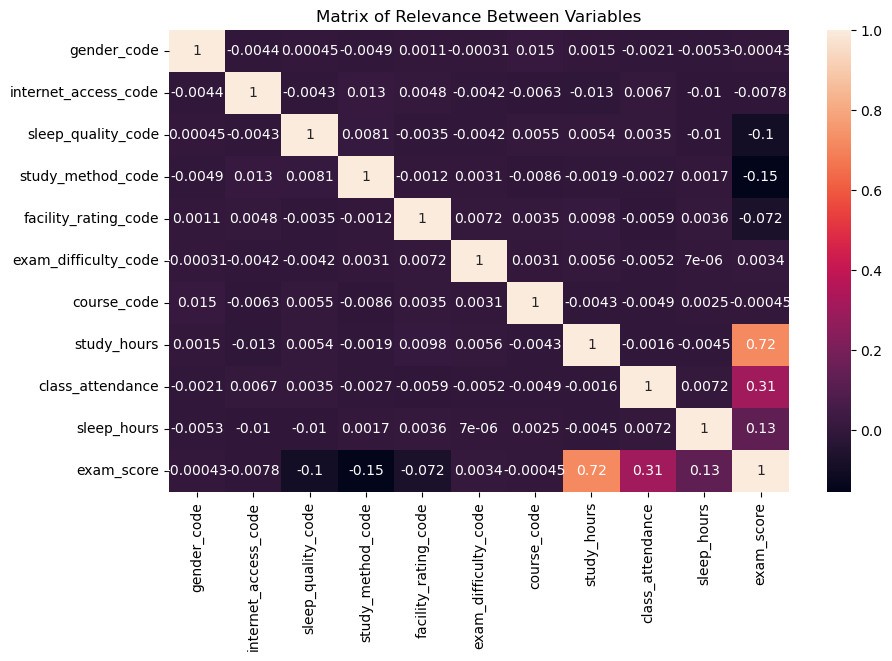

In [33]:
numerical_data = df[["gender_code","internet_access_code","sleep_quality_code","study_method_code","facility_rating_code","exam_difficulty_code","course_code","study_hours","class_attendance","sleep_hours","exam_score"]]
correlation = numerical_data.corr()

plt.figure(figsize=(10,6))
plt.title("Matrix of Relevance Between Variables")
sns.heatmap(correlation,annot=True)
plt.show()

In [41]:
y = df["exam_score"]
x = df[["gender_code","internet_access_code","sleep_quality_code","study_method_code","facility_rating_code","exam_difficulty_code","course_code","study_hours","class_attendance","sleep_hours"]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("The shape of the train set ",X_train.shape)
print("The shape of the test set ",X_test.shape)

The shape of the train set  (16000, 10)
The shape of the test set  (4000, 10)


In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("The constant of the model ",lm.intercept_)

The constant of the model  12.815705028976645


In [51]:
predictions = lm.predict(X_test)
score = lm.score(X_test,y_test)
print(f"The score of the model (R^2):{score*100:.2f}")

The score of the model (R^2):66.75


In [53]:
y_new = df["exam_score"]
x_new = df[["sleep_quality_code","study_method_code","study_hours","class_attendance","sleep_hours"]]
X_train,X_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
score = lm.score(X_test,y_test)
print(f"The score of the model (R^2):{score*100:.2f}")

The score of the model (R^2):66.18


In [71]:
mapping_dict = {}
for col in ['sleep_quality', 'study_method']:
    mapping_dict[col] = df.set_index(col)[col+'_code'].to_dict()

def predict_score(study_hours, attendance, sleep_hours, sleep_quality, study_method):
    sleep_quality_code = mapping_dict['sleep_quality'][sleep_quality]
    study_method_code = mapping_dict['study_method'][study_method]
    
    try:
        features = pd.DataFrame([[sleep_quality_code, study_method_code, study_hours, attendance, sleep_hours]], 
                                columns=["sleep_quality_code", "study_method_code", "study_hours", "class_attendance", "sleep_hours"])
        prediction = lm.predict(features)[0]
        
        if prediction > 100:
            prediction = 100
        elif prediction < 0:
            prediction = 0
        
        return f"Predicted Exam Score: {prediction:.2f}"
    except KeyError:
        return f"Error: Invalid input! Please check '{sleep_quality}' or '{study_method}' spelling."

print(predict_score(5, 90, 7, 'poor', 'online videos')) 
print(predict_score(15, 100, 8, 'average', 'online videos'))
print(predict_score(5, 90, 7, 'Good', 'online videos'))

Predicted Exam Score: 70.85
Predicted Exam Score: 100.00


KeyError: 'Good'